## Import

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [4]:
from ML.utils.utils import *
from ML.utils.Data_preparator import Data_preparator
from ML.utils.Model_evaluator import Model_evaluator
from physics.Iso_data_handler import Iso_data_handler
from physics.Data_visualiser import Data_visualiser

In [5]:
physical_model = "MIST"
path_to_data = "../../../../../../data/MIST_v1.2_vvcrit0.0_basic_isos/"
path_to_results = "../../../../../../results/K_fold/"
path_to_predictions = "../../../../../../predictions/K_fold"
tag = "log_g_filtered_bigger_1"

## Data preparation

This notebook contains the results of the model which are trained using all the data from MIST and filtered on the phases

Reading MIST dataframe from csv file...


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,3.486221,3.131342,-1.0,-0.25,0.100000,0.153402
1,5.0,3.487362,3.126808,-1.0,-0.25,0.102645,0.160326
2,5.0,3.489243,3.119367,-1.0,-0.25,0.107039,0.171785
3,5.0,3.491102,3.112165,-1.0,-0.25,0.111419,0.183099
4,5.0,3.492937,3.105143,-1.0,-0.25,0.115789,0.194305
...,...,...,...,...,...,...,...
1467117,10.3,4.402490,7.777159,6.0,0.50,0.532726,-1.806255
1467118,10.3,4.387132,7.783242,6.0,0.50,0.532730,-1.809295
1467119,10.3,4.371789,7.789130,6.0,0.50,0.532735,-1.812237
1467120,10.3,4.356480,7.794844,6.0,0.50,0.532741,-1.815091


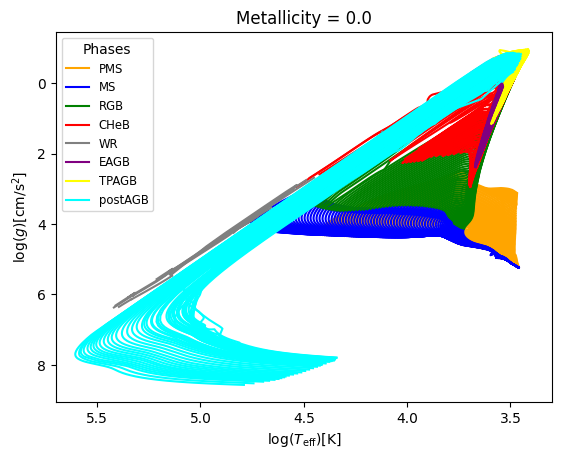

In [6]:
iso_handler = Iso_data_handler(path_to_data, 
                              ['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'phase', 'metallicity', 'star_mass', 'log_R'], 
                              physical_model, reclassify=True)

iso_df = iso_handler.get_isochrone_dataframe()
display(iso_df)
data_visualiser = Data_visualiser(iso_df, physical_model)
data_visualiser.plot_Kiel([], [0.0])

In [7]:
print_uniques("log_g", iso_df)
# print_uniques_count("log_g", iso_df)

log_g : 1467122 unique values, range [-1.14489780699774, 8.654432637941216]


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,4.494412,4.346972,0.0,-0.25,13.584360,0.610679
1,5.0,4.497517,4.345776,0.0,-0.25,13.765512,0.614753
2,5.0,4.500556,4.344580,0.0,-0.25,13.942887,0.618755
3,5.0,4.504040,4.343050,0.0,-0.25,14.591712,0.624670
4,5.0,4.507576,4.341483,0.0,-0.25,15.426062,0.631187
...,...,...,...,...,...,...,...
1140739,10.3,3.425746,-0.551440,5.0,0.50,0.602856,2.384899
1140740,10.3,3.426469,-0.560350,5.0,0.50,0.598549,2.387797
1140741,10.3,3.427744,-0.566057,5.0,0.50,0.594116,2.389036
1140742,10.3,3.429413,-0.569225,5.0,0.50,0.589648,2.388981


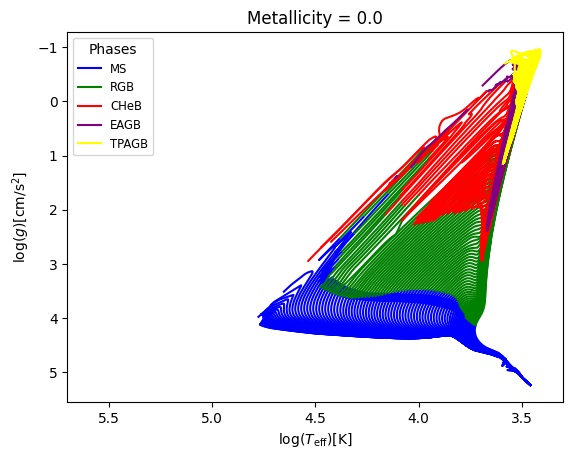

In [8]:
phase_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5]})
display(phase_filtered_iso_df)
data_visualiser_phase_filtered = Data_visualiser(phase_filtered_iso_df, physical_model)
data_visualiser_phase_filtered.plot_Kiel([], [0.0])

In [9]:
print_uniques("log_g", phase_filtered_iso_df)
# print_uniques_count("log_g", phase_filtered_iso_df)

log_g : 1140744 unique values, range [-1.14489780699774, 6.259434356871683]


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,4.494412,4.346972,0.0,-0.25,13.584360,0.610679
1,5.0,4.497517,4.345776,0.0,-0.25,13.765512,0.614753
2,5.0,4.500556,4.344580,0.0,-0.25,13.942887,0.618755
3,5.0,4.504040,4.343050,0.0,-0.25,14.591712,0.624670
4,5.0,4.507576,4.341483,0.0,-0.25,15.426062,0.631187
...,...,...,...,...,...,...,...
676289,10.3,3.548780,1.089622,4.0,0.50,0.864100,1.642531
676290,10.3,3.547387,1.070611,4.0,0.50,0.864020,1.652016
676291,10.3,3.545978,1.051561,4.0,0.50,0.863938,1.661521
676292,10.3,3.544593,1.032569,4.0,0.50,0.863855,1.670996


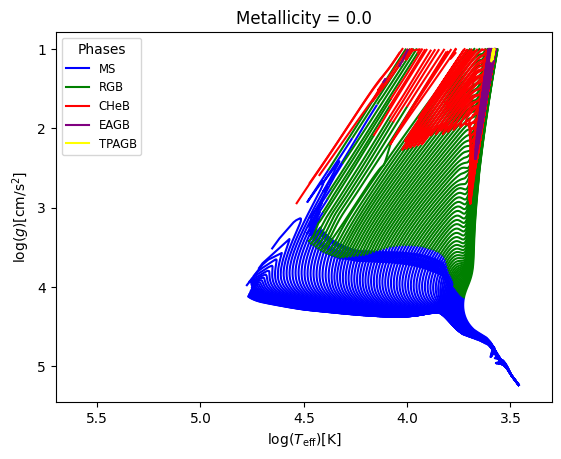

In [10]:
phase_log_g_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5], "log_g" : (">", 1)})
display(phase_log_g_filtered_iso_df)
data_visualiser_phase_age_filtered = Data_visualiser(phase_log_g_filtered_iso_df, physical_model)
data_visualiser_phase_age_filtered.plot_Kiel([], [0.0])

In [11]:
X_train, X_ivs, y_train, y_ivs = \
    Data_preparator.split_data(phase_log_g_filtered_iso_df, x_cols=['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'metallicity'], 
                               y_cols=['star_mass', 'log_R'], random_state=12, print_stats=True)

print(X_train.shape, X_ivs.shape)
print(y_train.shape, y_ivs.shape)

Training set statistics:
Range in train data for the mass parameter : 0.099998052173157 - 298.5447575808816
Median value in train data for the mass parameter: 2.7177438939913796
Mean value in train data for the mass parameter: 10.80929064044624
Range in train data for the radius parameter : -0.9974747647513328 - 2.7446161135652143
Median value in train data for the radius parameter: 0.7708717021877387
Mean value in train data for the radius parameter: 0.7585998430186908

Testing set statistics:
Range in test data for the mass parameter : 0.0999979840073621 - 296.5221171165397
Median value in test data for the mass parameter: 2.731912069498406
Mean value in test data for the mass parameter: 10.744663726571664
Range in test data for the radius parameter : -0.9973627769638856 - 2.746234419158992
Median value in test data for the radius parameter: 0.7717137279787416
Mean value in test data for the radius parameter: 0.7585665592041747

(507220, 4) (169074, 4)
(507220, 2) (169074, 2)


## Model training

### Linear regression

In [12]:
lr_evaluator = Model_evaluator("linear_regression", path=path_to_results, physical_model=physical_model)


log_g_filtered_bigger_1 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.30957457095982177
RMSE :  21.454420677798964
MAE :  10.606212875575608
MedAE :  7.253126563471075
CORR :  0.5563942588674786
MAX_ER :  258.0334344436863
Percentiles : 
  75th percentile :  13.382149590240639
  90th percentile :  17.177437647653125
  95th percentile :  20.297896714767795
  99th percentile :  97.22783363897157



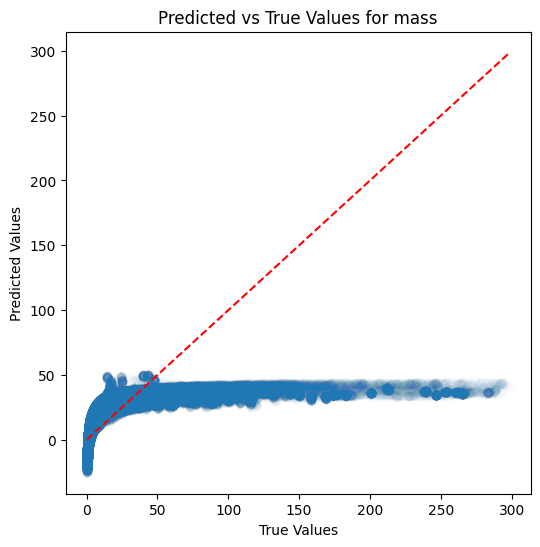

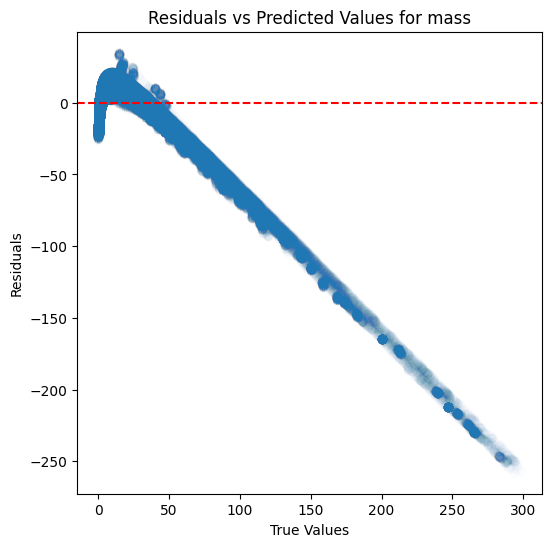

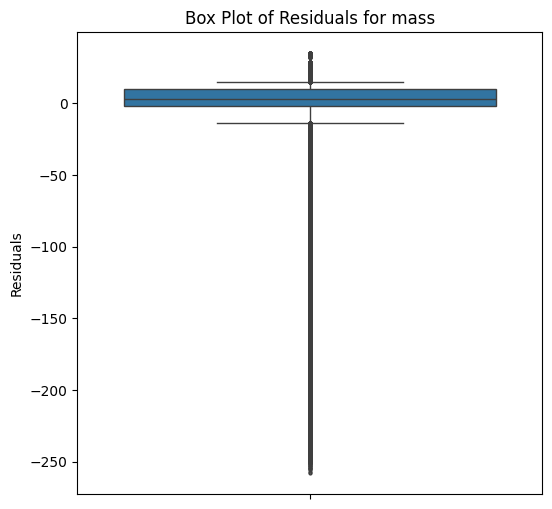

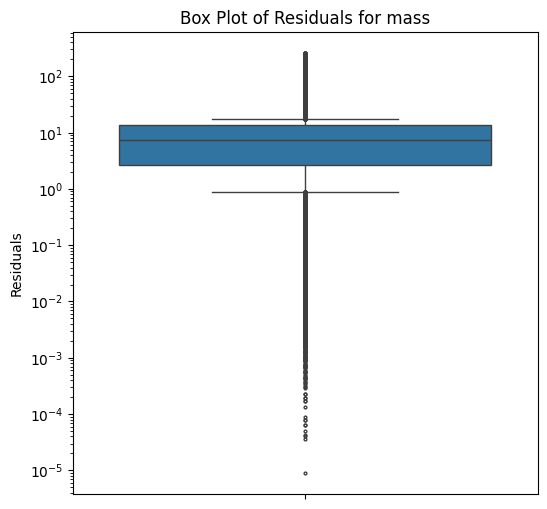

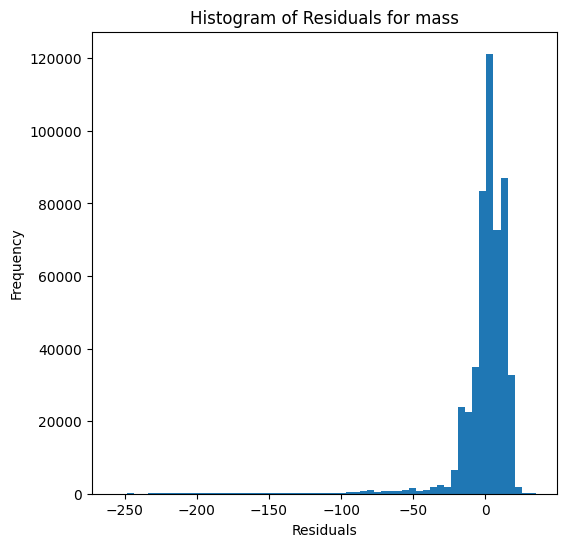

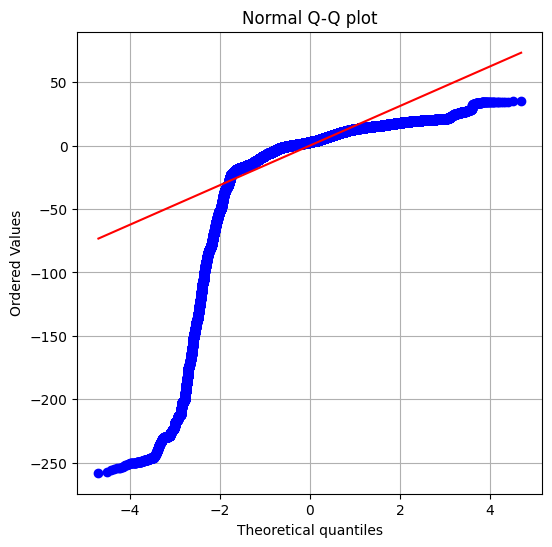


radius results:
RVE :  0.9851793167913713
RMSE :  0.08456501324053435
MAE :  0.06216028862751173
MedAE :  0.04524150360633633
CORR :  0.9925619964473222
MAX_ER :  0.4613400889338657
Percentiles : 
  75th percentile :  0.08775920649713656
  90th percentile :  0.13347870217049282
  95th percentile :  0.16292467288242074
  99th percentile :  0.28621956346470534



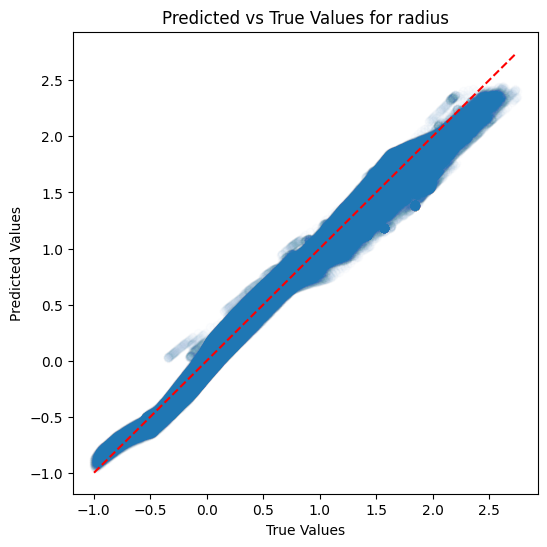

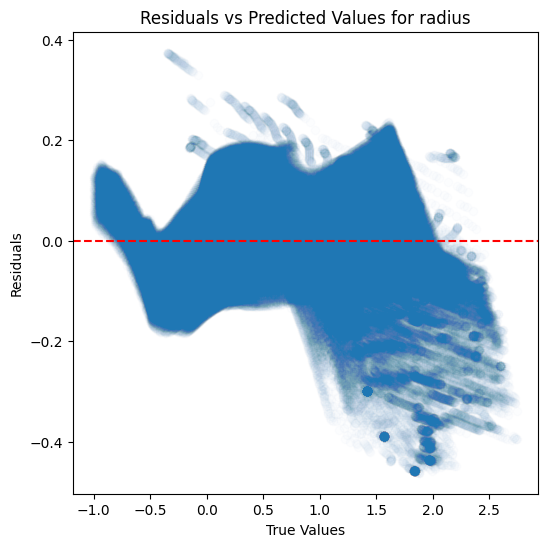

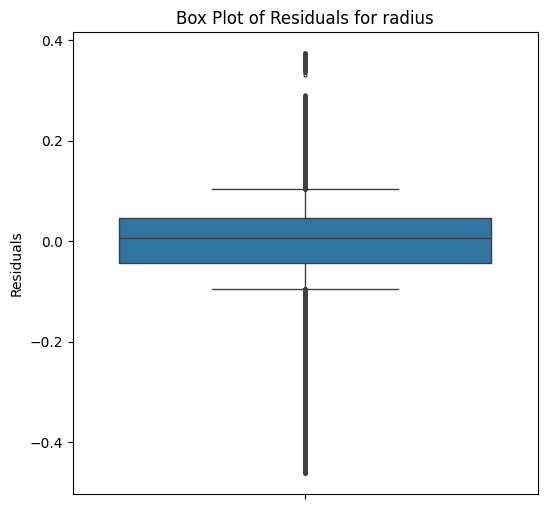

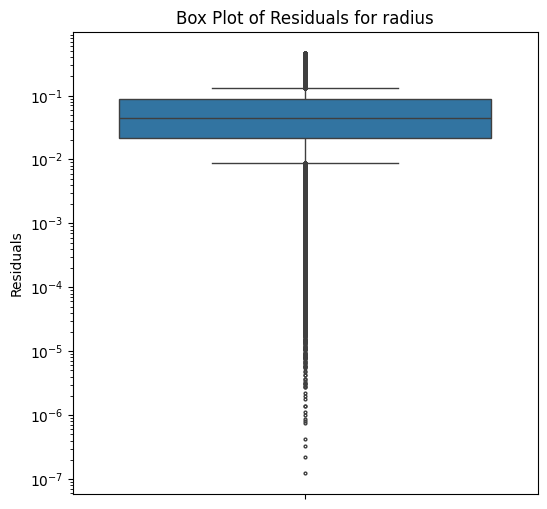

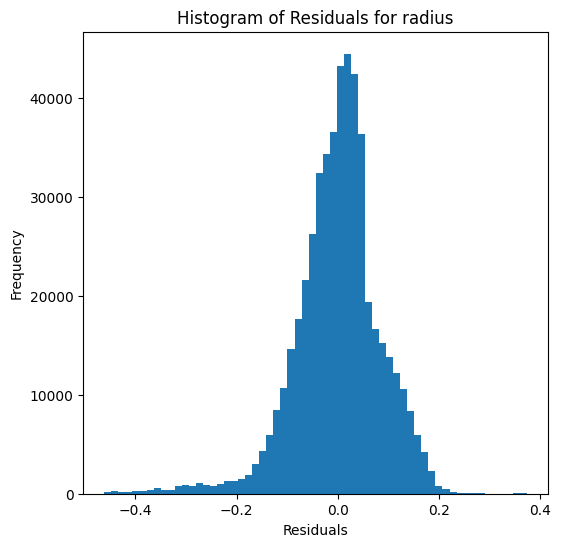

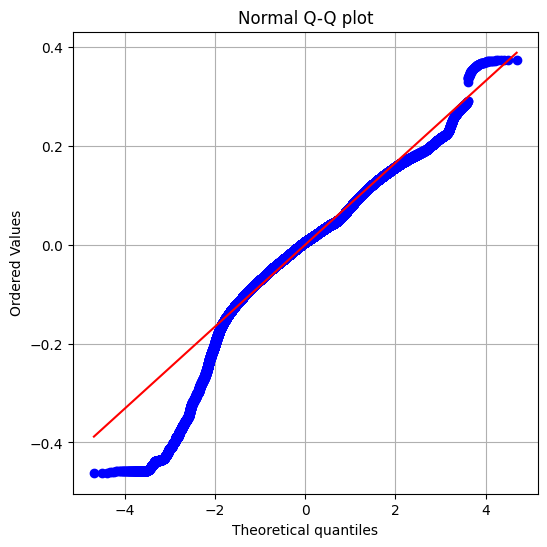

In [13]:
lr_evaluator.evaluate_Kfold_results(LinearRegression, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Decision tree

In [14]:
dt_evaluator = Model_evaluator("decision_tree", path=path_to_results, physical_model=physical_model)


log_g_filtered_bigger_1 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9946868263054499
RMSE :  1.882068586401629
MAE :  0.18841003606903492
MedAE :  0.0030487579311540003
CORR :  0.9973427138081901
MAX_ER :  180.33810094105186
Percentiles : 
  75th percentile :  0.017745845329939947
  90th percentile :  0.09297130975105905
  95th percentile :  0.29609860929228415
  99th percentile :  4.119614795945138



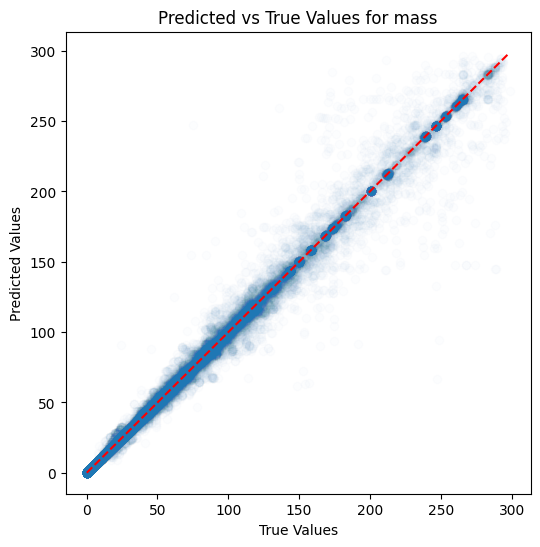

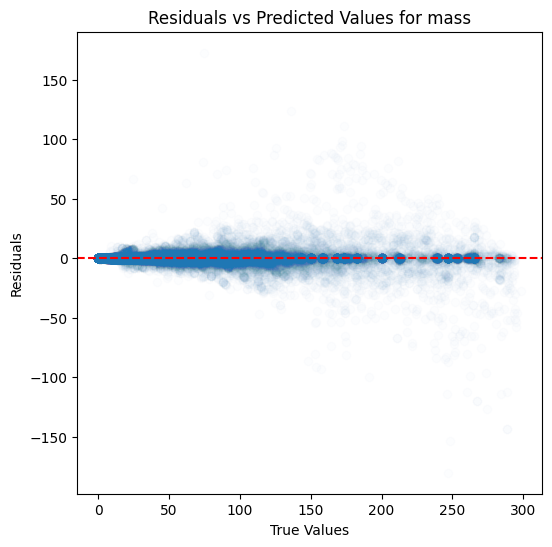

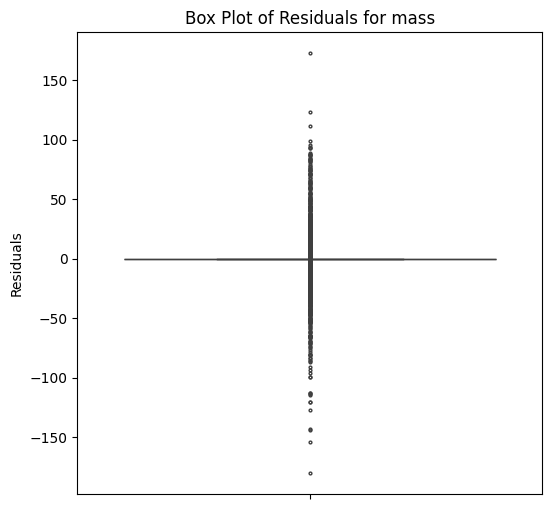

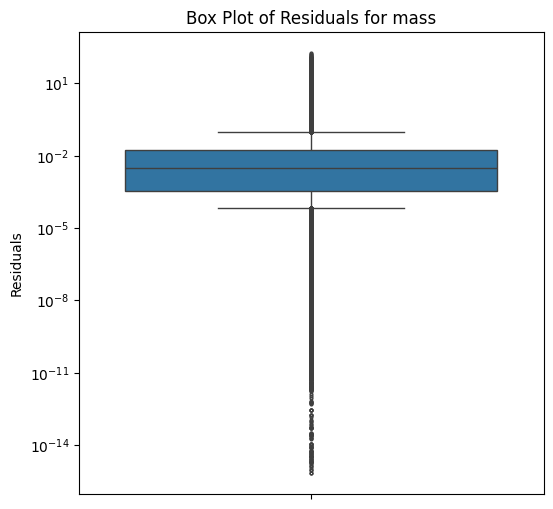

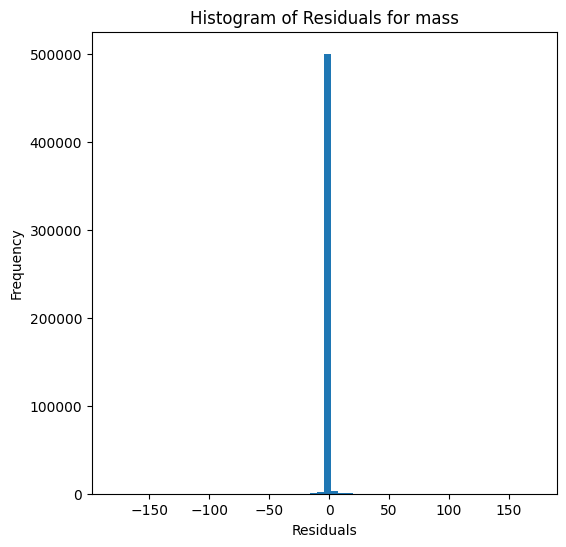

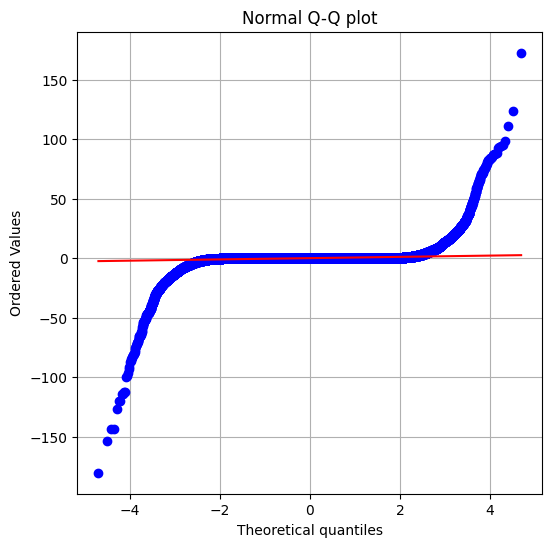


radius results:
RVE :  0.9997917988111203
RMSE :  0.010023367461374352
MAE :  0.005766345120228109
MedAE :  0.003421447724573411
CORR :  0.9998959140061688
MAX_ER :  0.4456966325748054
Percentiles : 
  75th percentile :  0.007339954703990598
  90th percentile :  0.01282366501180632
  95th percentile :  0.017920276024282478
  99th percentile :  0.038448634569792736



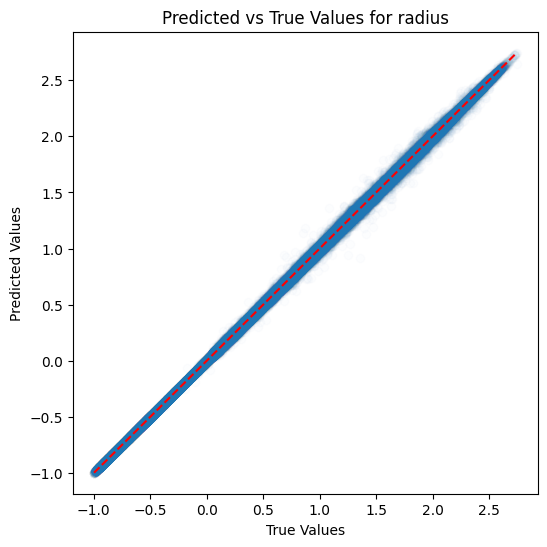

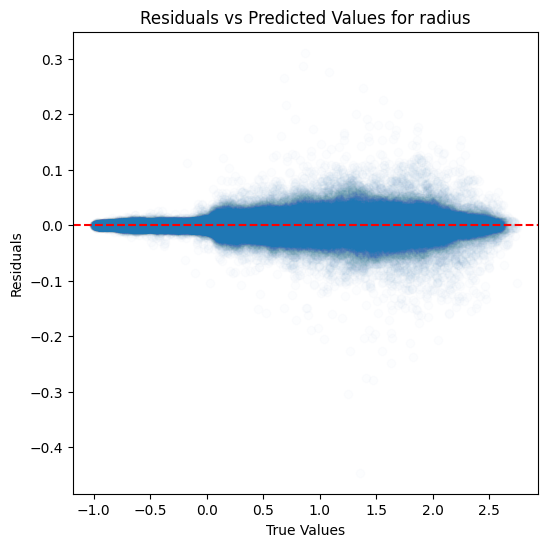

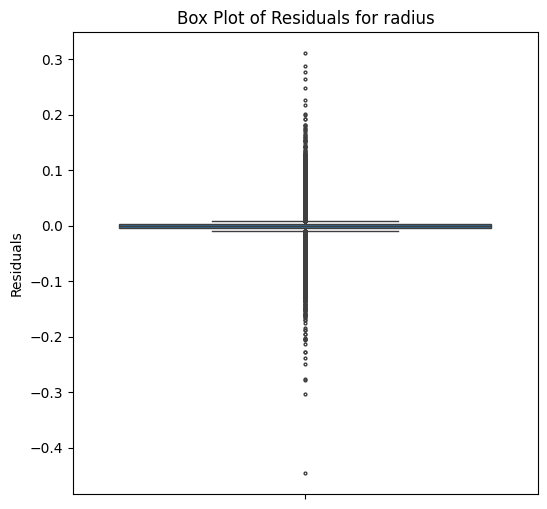

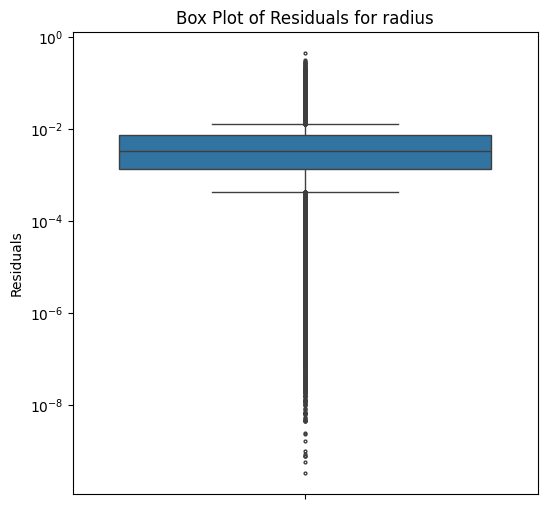

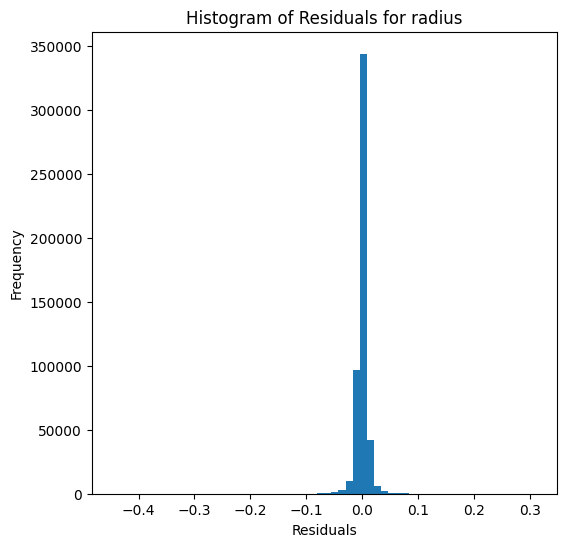

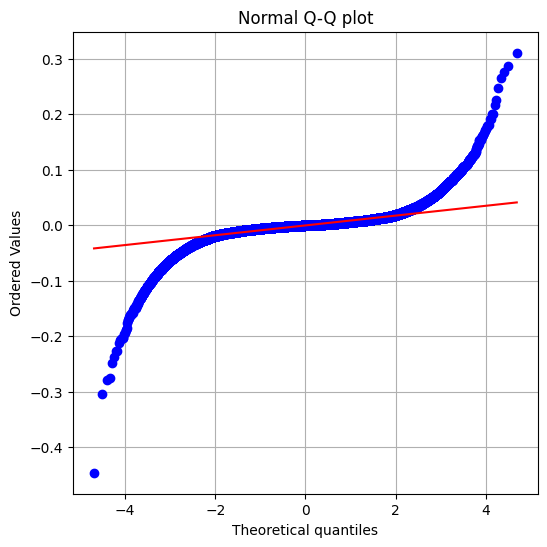

In [15]:
dt_evaluator.evaluate_Kfold_results(DecisionTreeRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### K-nearest neighbours

In [16]:
knn_evaluator = Model_evaluator("KNN", path=path_to_results, physical_model=physical_model)


log_g_filtered_bigger_1 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9897472491155987
RMSE :  2.61493535997336
MAE :  0.3036109904276068
MedAE :  0.00869273425641881
CORR :  0.9949609844745871
MAX_ER :  129.66147537065044
Percentiles : 
  75th percentile :  0.04142822143979508
  90th percentile :  0.18530326478244716
  95th percentile :  0.6136006104154781
  99th percentile :  6.233423887215229



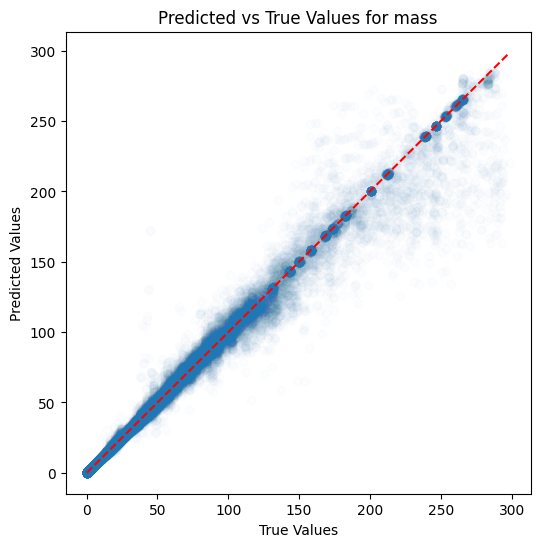

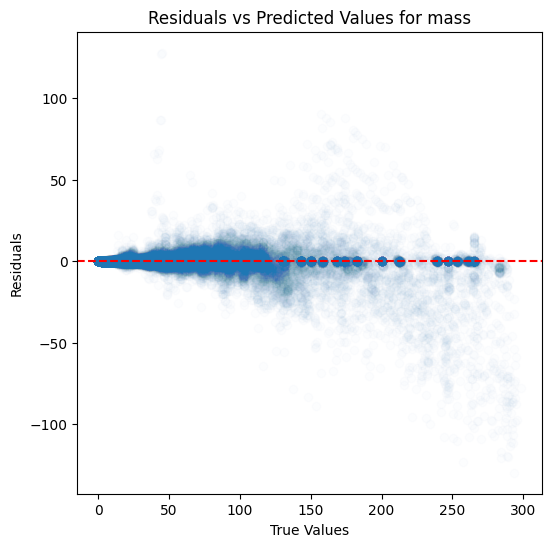

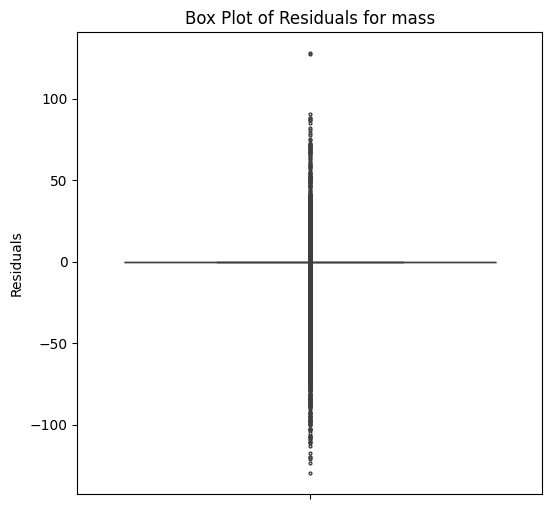

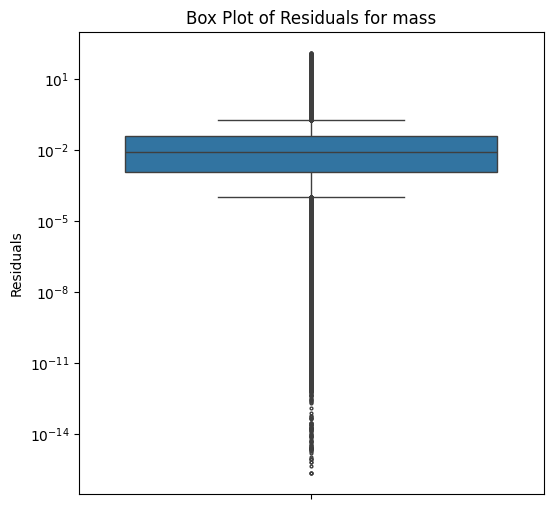

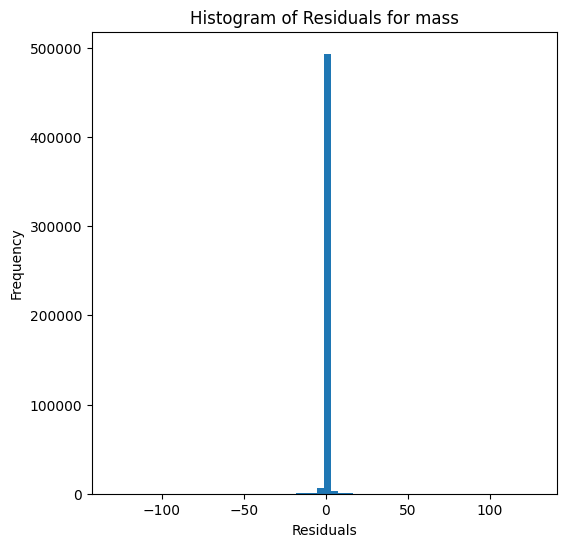

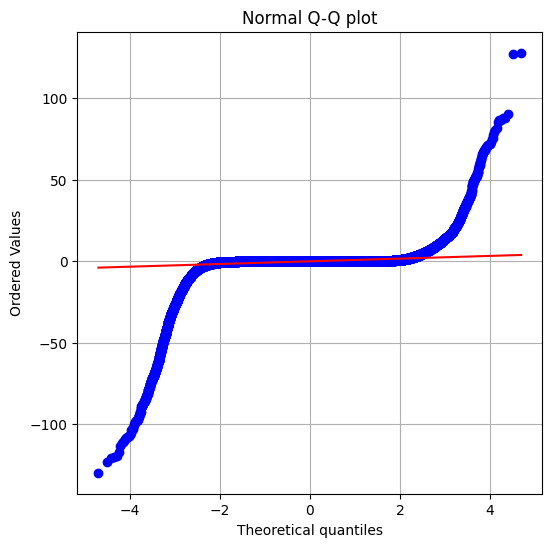


radius results:
RVE :  0.999903078245907
RMSE :  0.006840118614655022
MAE :  0.0040917848361153464
MedAE :  0.0026285737769721207
CORR :  0.9999516122797355
MAX_ER :  0.26881310335420894
Percentiles : 
  75th percentile :  0.00518112836229806
  90th percentile :  0.009152703121242348
  95th percentile :  0.012347203142563556
  99th percentile :  0.022932781686907846



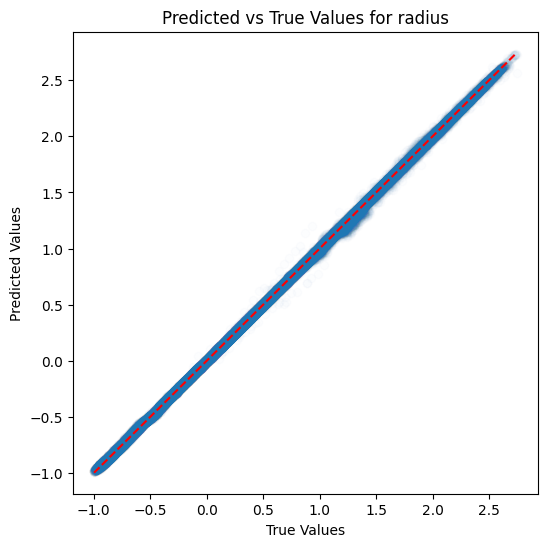

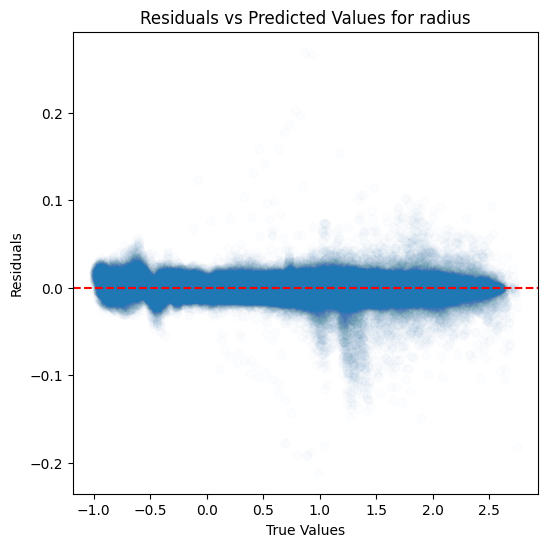

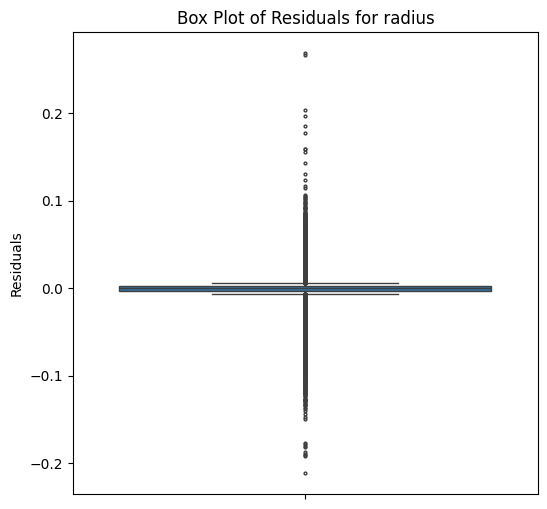

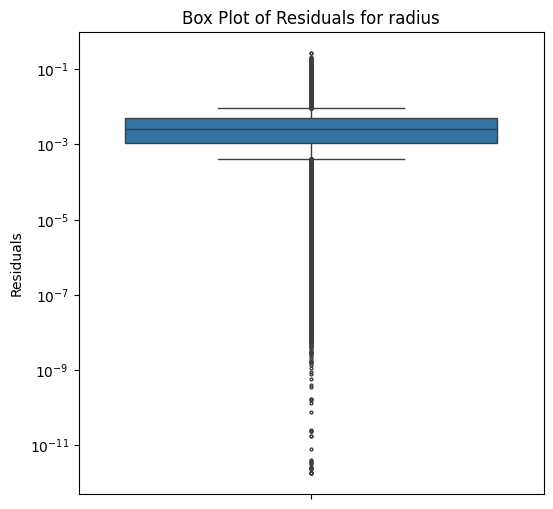

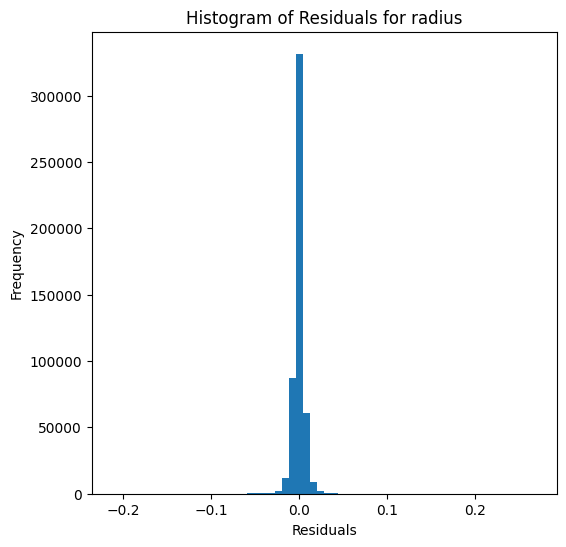

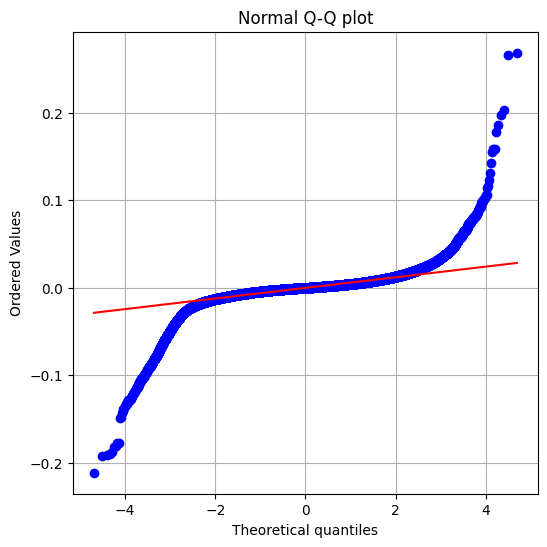

In [17]:
knn_evaluator.evaluate_Kfold_results(KNeighborsRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Random forests

In [18]:
rf_evaluator = Model_evaluator("random_forest", path=path_to_results, physical_model=physical_model)


log_g_filtered_bigger_1 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9976878204348539
RMSE :  1.241565552399366
MAE :  0.13643677074916627
MedAE :  0.0041102224926941044
CORR :  0.9988445814323644
MAX_ER :  97.64840562516173
Percentiles : 
  75th percentile :  0.015012704448115421
  90th percentile :  0.06623826569285172
  95th percentile :  0.23285057018694227
  99th percentile :  2.96346245214801



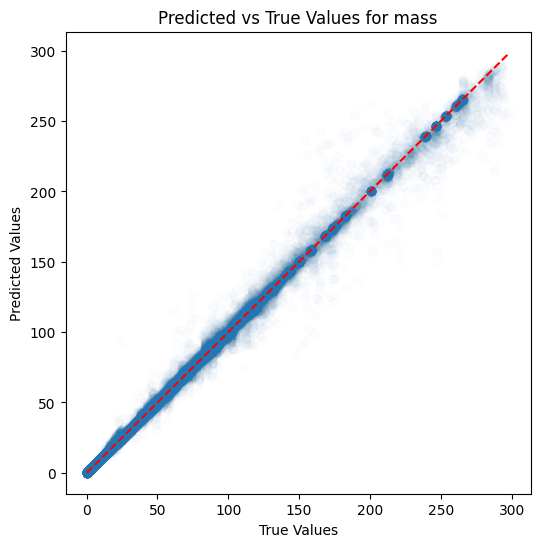

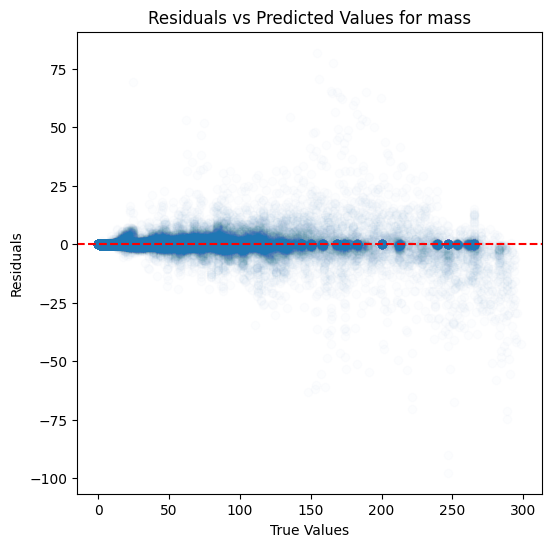

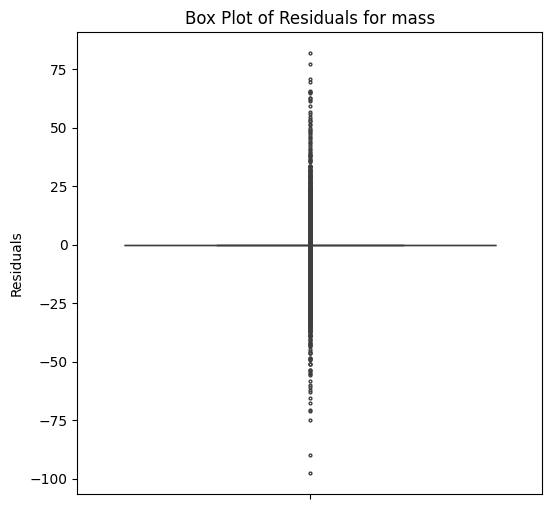

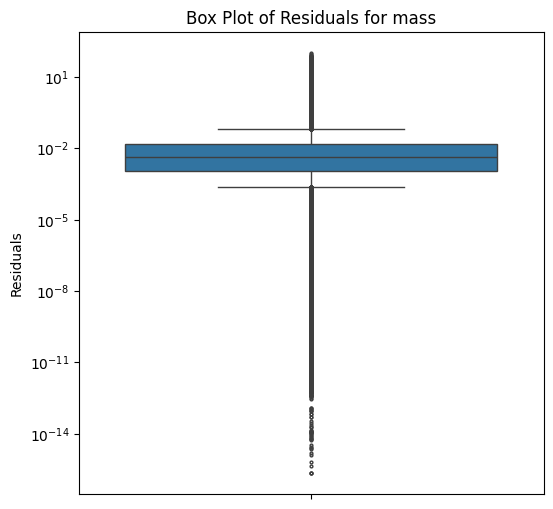

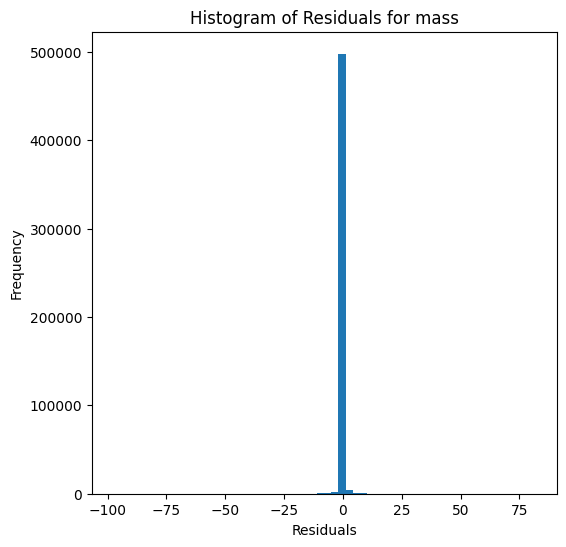

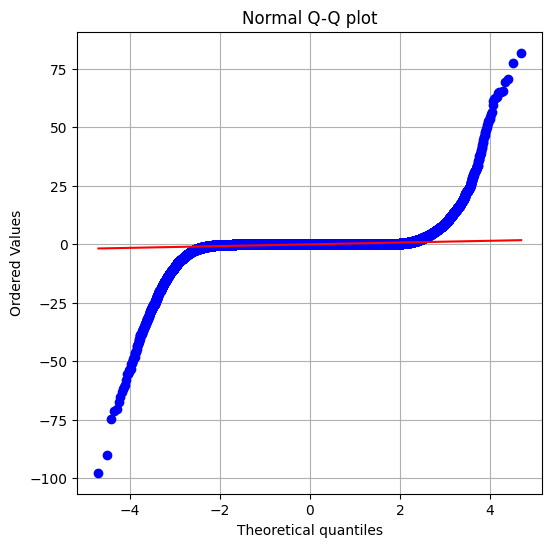


radius results:
RVE :  0.9999485466166568
RMSE :  0.004983321841152429
MAE :  0.0025818094757058276
MedAE :  0.001321212608208
CORR :  0.999974276293344
MAX_ER :  0.31579351100010644
Percentiles : 
  75th percentile :  0.003077137041076962
  90th percentile :  0.00611127425646444
  95th percentile :  0.00903682023108942
  99th percentile :  0.018265713635569367



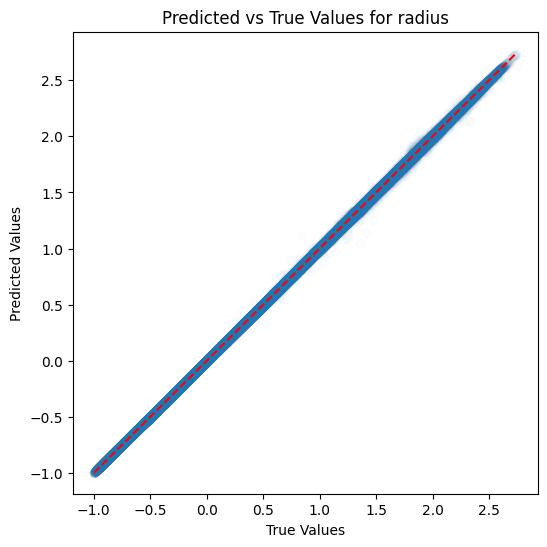

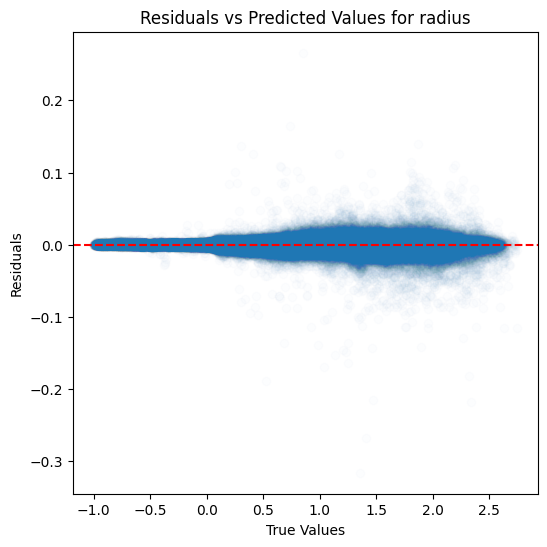

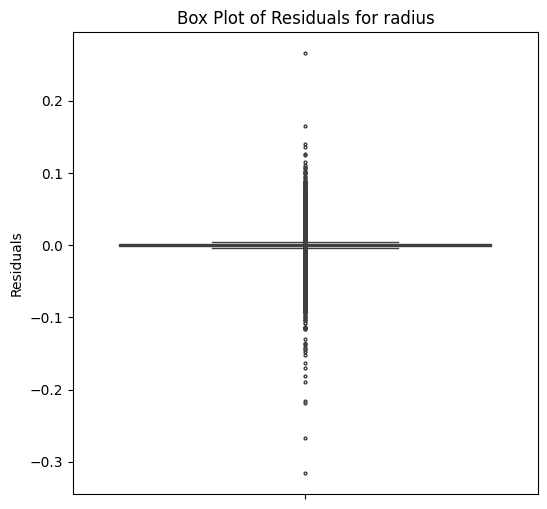

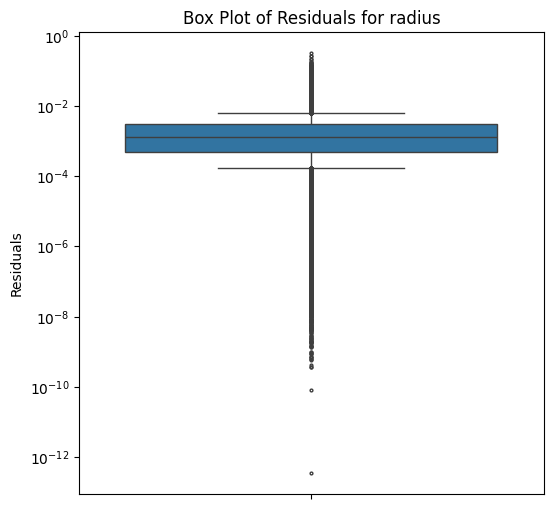

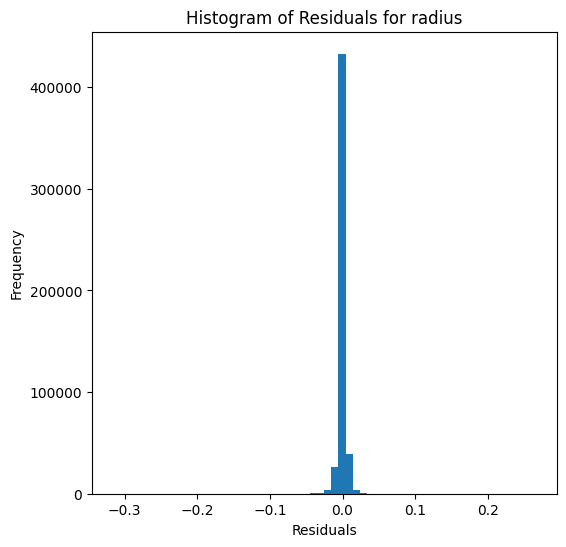

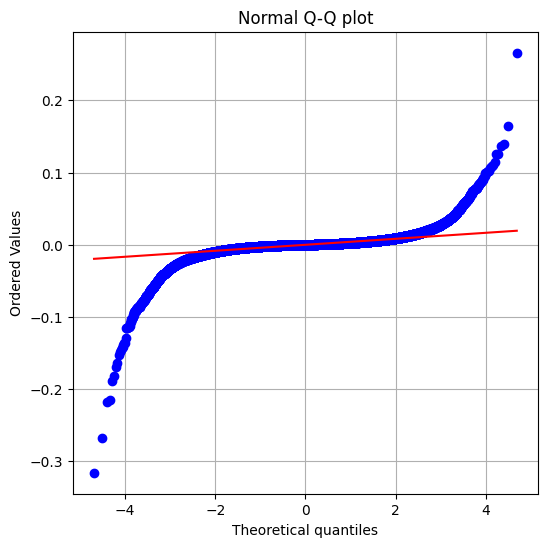

In [19]:
rf_evaluator.evaluate_Kfold_results(RandomForestRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### XGBoost

In [20]:
xgb_evaluator = Model_evaluator("xgboost", path=path_to_results, physical_model=physical_model)


log_g_filtered_bigger_1 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9941225276209507
RMSE :  1.9794933565471582
MAE :  0.5047797097844574
MedAE :  0.09644901311453496
CORR :  0.997056998416332
MAX_ER :  75.52842069762545
Percentiles : 
  75th percentile :  0.24972637619304816
  90th percentile :  0.8864541798019647
  95th percentile :  2.0827783801807556
  99th percentile :  8.04794722066996



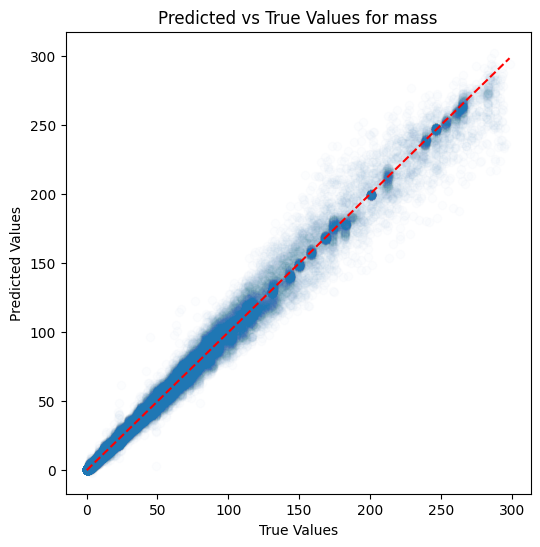

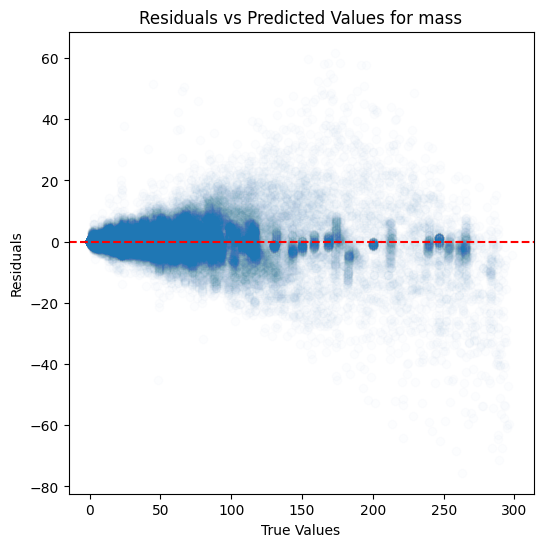

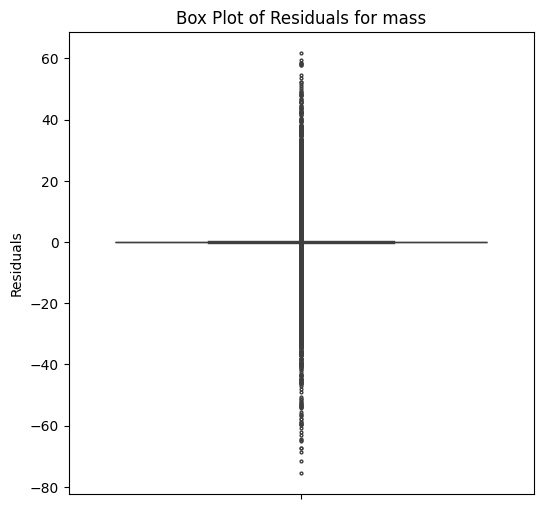

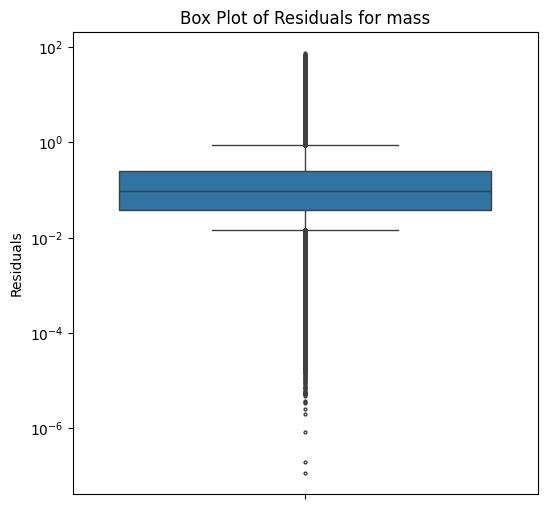

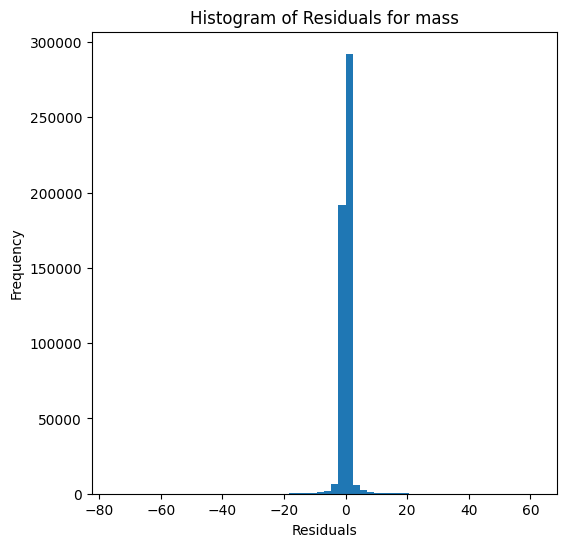

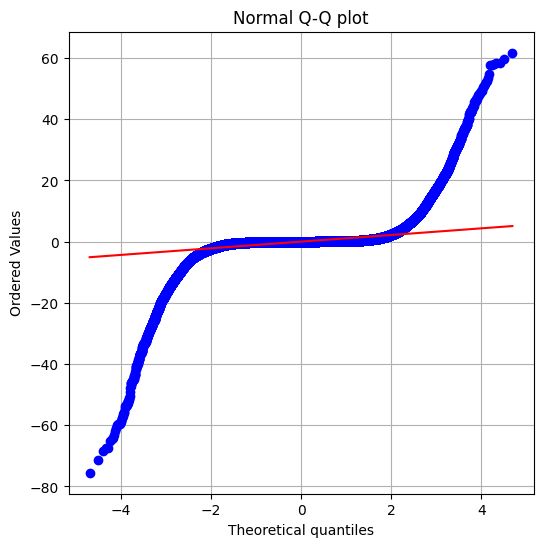


radius results:
RVE :  0.9996265706684196
RMSE :  0.013423350763053057
MAE :  0.00992835751062569
MedAE :  0.007682667231228457
CORR :  0.9998132881407624
MAX_ER :  0.3789259310876392
Percentiles : 
  75th percentile :  0.01375469030509282
  90th percentile :  0.02116779939660241
  95th percentile :  0.02653697700456703
  99th percentile :  0.03974836626866972



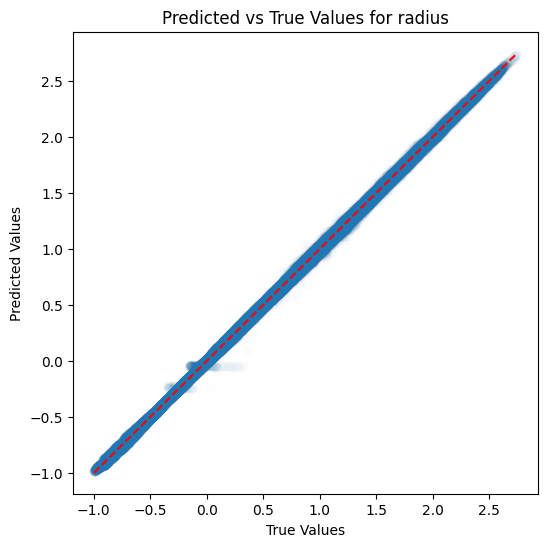

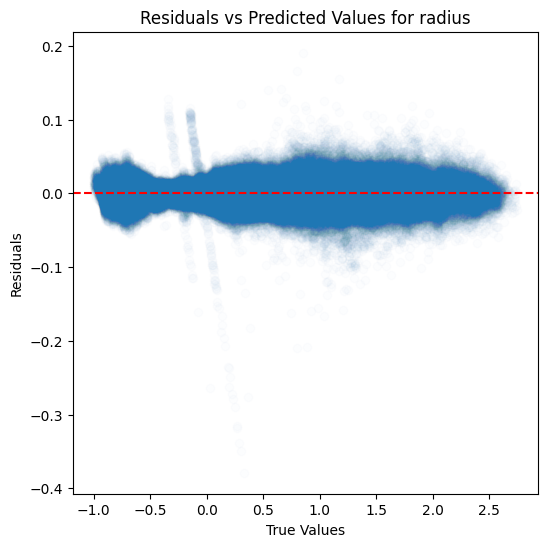

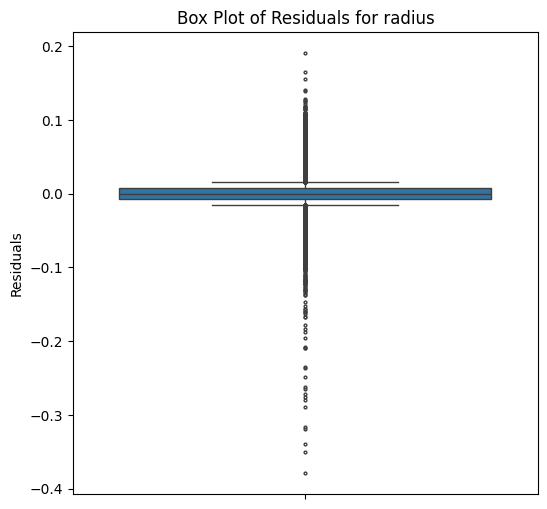

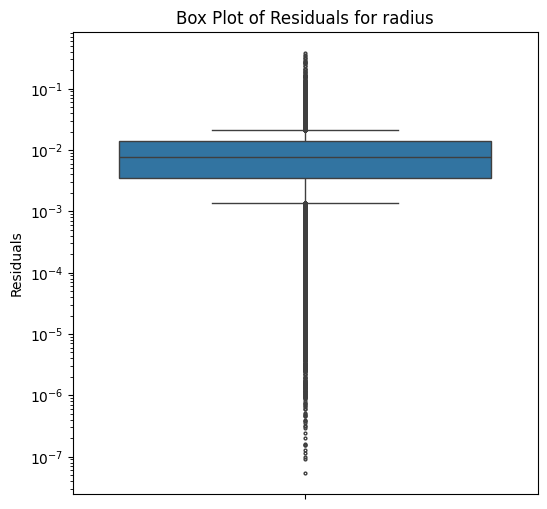

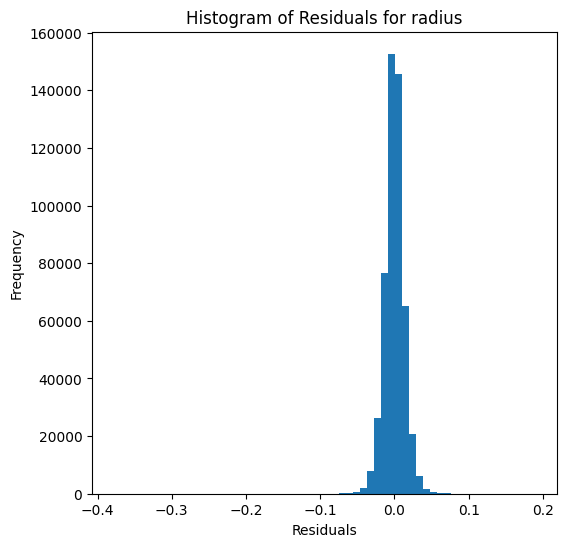

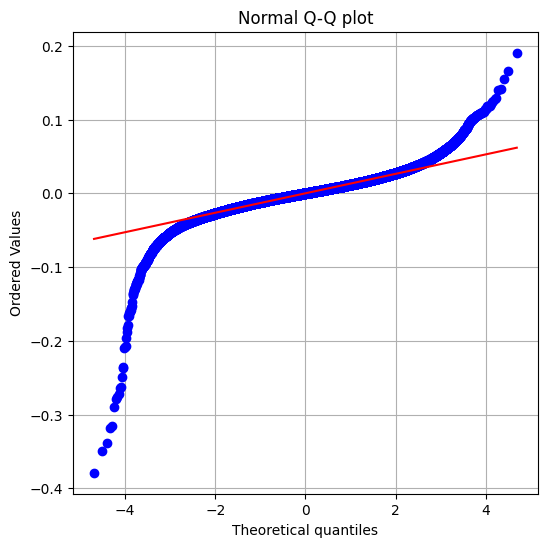

In [21]:
xgb_evaluator.evaluate_Kfold_results(XGBRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### Multi-layer perceptron

In [22]:
mlp_evaluator = Model_evaluator("mlp", path=path_to_results, physical_model=physical_model)


log_g_filtered_bigger_1 train data :
split 1 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


3.096006042176265
2 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


3.034650779038856
3 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


3.3784642182856213
4 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


2.986930321348753
5 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


2.9885614495614967

mass results:
RVE :  0.977543317091482
RMSE :  3.871825220152855
MAE :  1.210759819436618
MedAE :  0.4982953883567057
CORR :  0.9887514283795037
MAX_ER :  168.8245908481736
Percentiles : 
  75th percentile :  0.7686140093360381
  90th percentile :  1.615144543035948
  95th percentile :  4.460318471960412
  99th percentile :  17.237290148458353



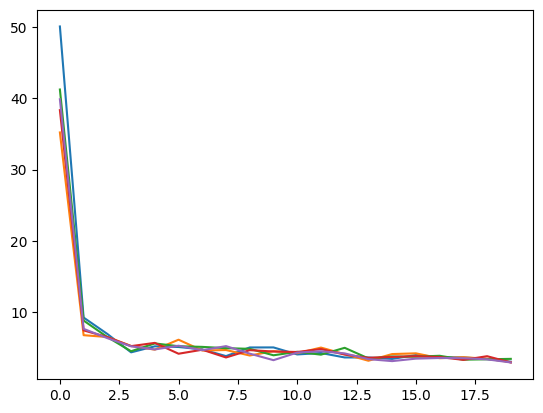

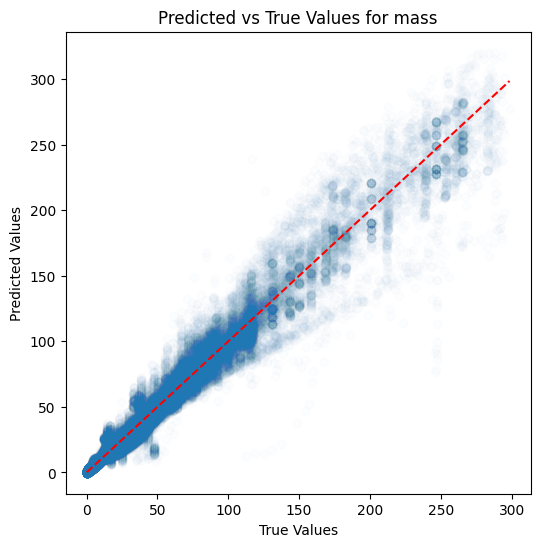

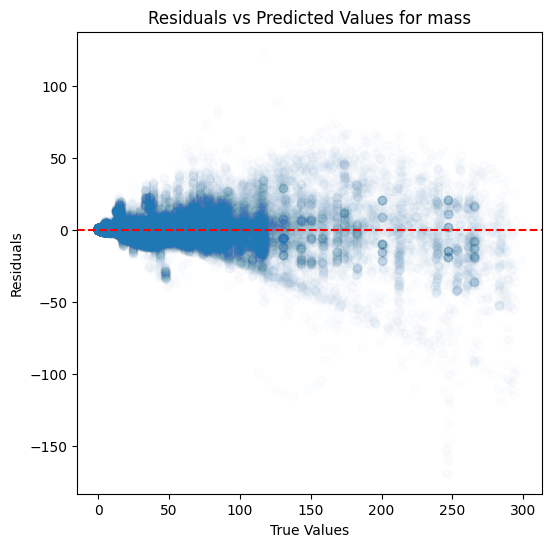

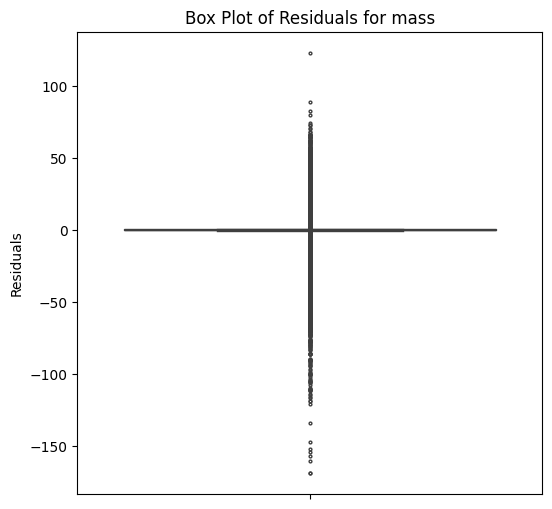

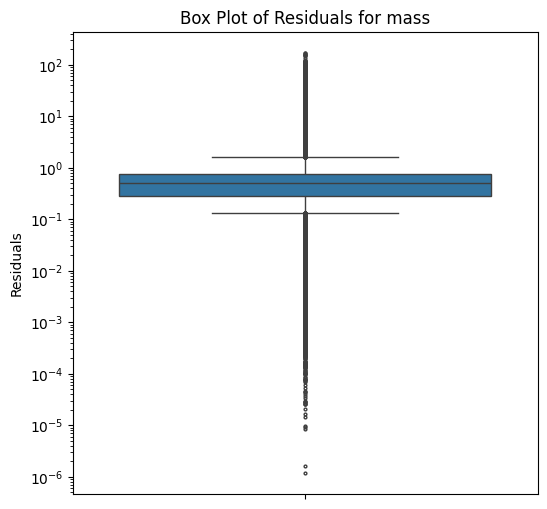

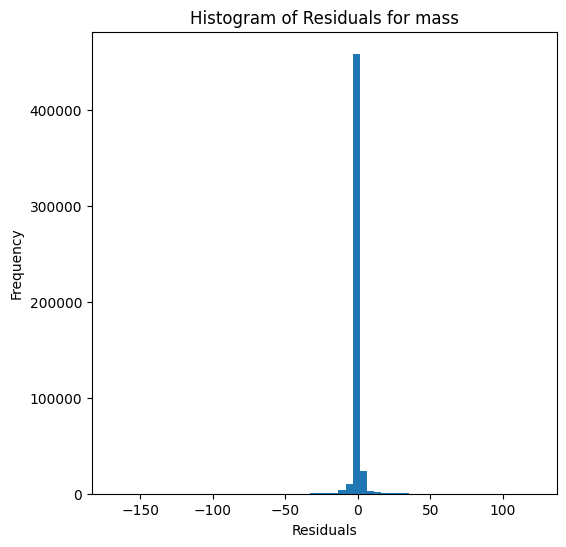

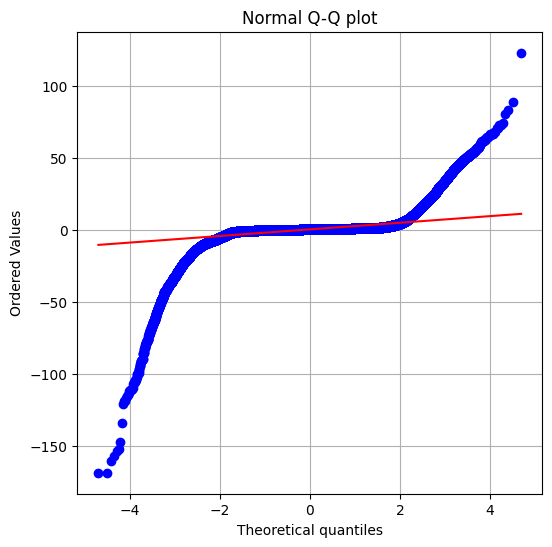


radius results:
RVE :  0.9898944228871319
RMSE :  0.0698336099470633
MAE :  0.052592441554750624
MedAE :  0.04215957214232087
CORR :  0.9949365842849771
MAX_ER :  0.8760999677287435
Percentiles : 
  75th percentile :  0.07231701913625319
  90th percentile :  0.10972551933404241
  95th percentile :  0.13725618227326142
  99th percentile :  0.2024897814147454



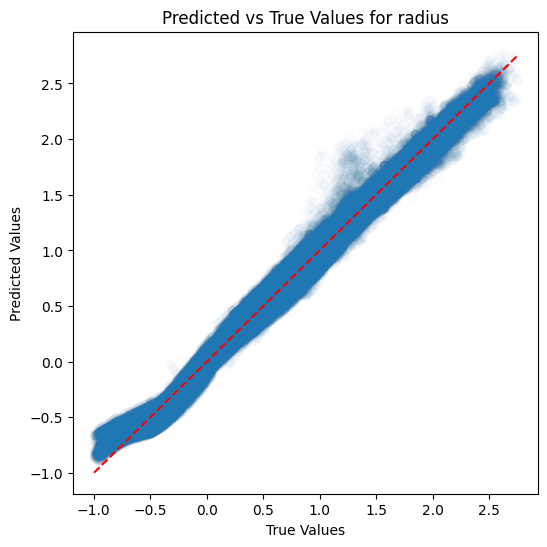

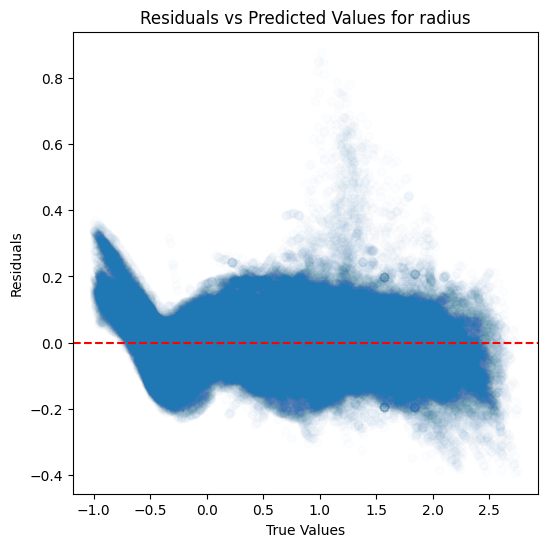

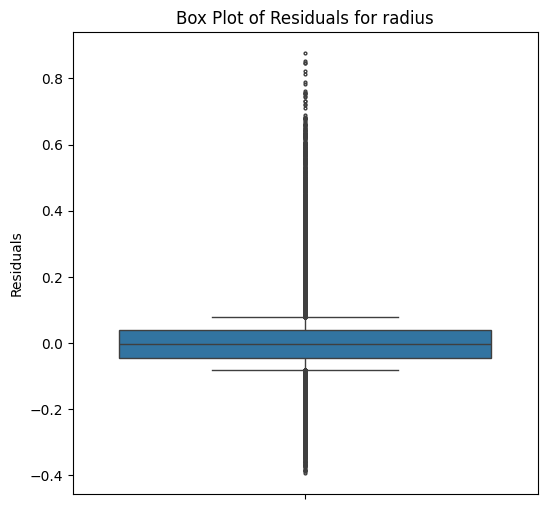

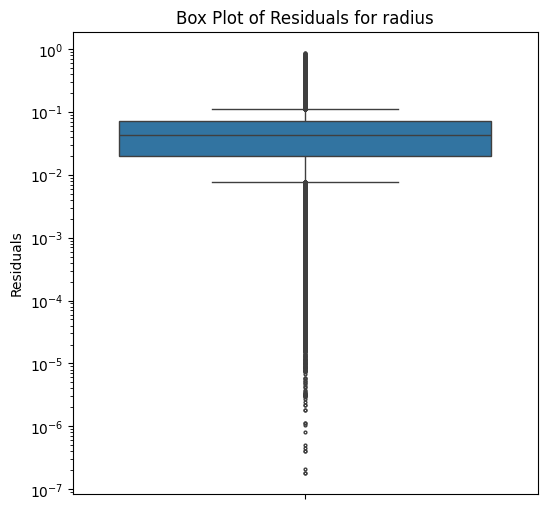

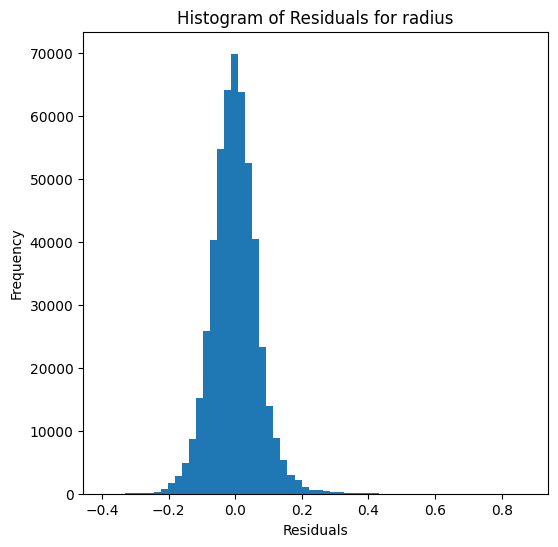

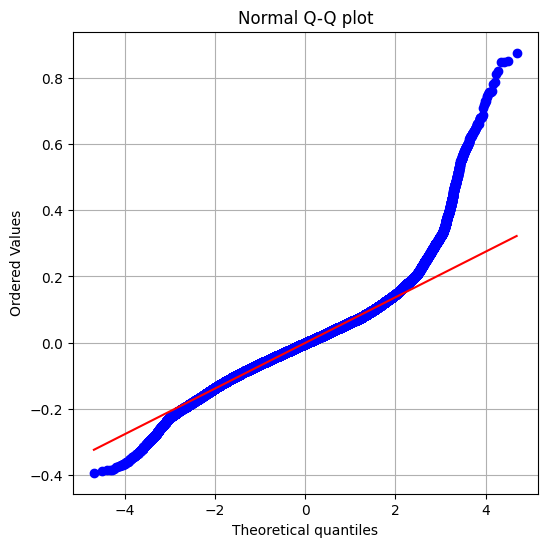

In [23]:
mlp_evaluator.evaluate_Kfold_results(MLPRegressor, X_train, y_train, path_to_predictions, tag, n_splits=5, random_state=12, override=True, use_preds=False, hidden_layer_sizes = (100, 100, 100, 100), max_iter=20, batch_size=400) #, override=False, use_preds=True)